
# 🧠 Heuristic-Based - Annotating Human vs. AI Content

This notebook helps you compare AI-generated and human-edited text using:
- **Levenshtein distance** (for textual edits)
- **Cosine similarity** (from transformer embeddings)

We will also show how to build and deploy it to a **Streamlit app** and then to Streamlit Cloud.


**Levenshtein Distance (Edit Distance)**

This is a way of measuring how different two pieces of text are by counting the minimum number of edits needed to change one into the other.

**The allowed edits are:**

Insertions (adding a character)

Deletions (removing a character)

Substitutions (replacing one character with another)

**Example:**
"cat" → "cut" requires 1 substitution (a → u), so the Levenshtein distance = 1.

So, the smaller the distance, the more similar the texts; a larger distance means they are more divergent.



**Cosine Similarity (using embeddings from transformers)**
When comparing meaning between long texts or sentences, we often convert the texts into high-dimensional number vectors using transformer models like BERT. These vectors capture the meaning/context of the text — these are called embeddings.

Cosine similarity measures how close the direction of two embedding vectors are, regardless of their length.

The value ranges from –1 to 1

1 → very similar / pointing in the same direction

0 → no relation

–1 → completely opposite meanings (rare in practice)

Think of two arrows in space: the more they point in the same direction, the higher their cosine similarity.

In [5]:
!pip uninstall -y transformers
!pip install transformers==4.40.1

Found existing installation: transformers 4.54.0
Uninstalling transformers-4.54.0:
  Successfully uninstalled transformers-4.54.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.1 which is incompatible.


In [6]:
!pip install textdistance torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 841.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [19]:
import textdistance
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel

In [8]:
# Comparing the Cosine Similarity between AI and a human-written texts
ai_text = "Artificial intelligence is transforming industries by automating complex tasks."
human_text = "AI is rapidly changing industries by automating both simple and complex operations."

In [9]:
# --- Part 1: Levenshtein Distance ---
# Calculate normalized Levenshtein distance between the two strings.
#   - Levenshtein distance counts how many edits (insertions, deletions, substitutions)
#     are needed to turn one string into the other.
#   - 'normalized_distance()' scales that value between 0 and 1
#       -> 0 = the texts are identical
#       -> 1 = completely different
lev_distance = textdistance.levenshtein.normalized_distance(ai_text, human_text)
print(f"Normalized Levenshtein Distance: {lev_distance:.3f} → This means the texts are about {lev_distance*100:.1f}% different (and roughly {100 - lev_distance*100:.1f}% similar)")

Normalized Levenshtein Distance: 0.627 → This means the texts are about 62.7% different (and roughly 37.3% similar)


In [10]:
# Raw Levenshtein distance (minimum number of edits required to turn one string into another)
raw_dist = textdistance.levenshtein.distance(ai_text, human_text)
print(f"Raw Levenshtein Distance: {raw_dist} → This means {raw_dist} character-level edits are needed to turn one text into the other.")

Raw Levenshtein Distance: 52 → This means 52 character-level edits are needed to turn one text into the other.


In [11]:
# --- Part 2: Embedding Cosine Similarity using Transformers ---

# Specify the model to use for generating sentence embeddings.
# 'all-MiniLM-L6-v2' is a small and fast model from the Sentence-Transformers family,
# optimized for computing sentence-level semantic similarity.
model_name = "sentence-transformers/all-MiniLM-L6-v2"

# Load the tokenizer associated with the model.
# The tokenizer converts raw text into tokens and input IDs the model can process.
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the actual transformer model.
# This model will generate context-aware embeddings (vectors) for the input text.
model = AutoModel.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [12]:
# Define a function to get the sentence embedding for any given text
def get_embedding(text):
    # Step 1: Tokenize the input text
    # - return_tensors="pt": returns PyTorch tensors
    # - truncation=True: cuts off text that's too long
    # - padding=True: ensures all sequences are the same length
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Step 2: Disable gradient tracking since we're not training (just getting embeddings)
    with torch.no_grad():
        # Step 3: Pass the tokenized input through the model
        output = model(**inputs)

    # Step 4: Take the mean of the last hidden state across tokens (dim=1)
    # - This gives a single 768-dimensional vector representing the sentence
    return output.last_hidden_state.mean(dim=1)

In [13]:
# Generate the sentence embedding for the AI-generated text
# This will be a 768-dimensional vector that captures the overall meaning of the sentence
embedding_ai = get_embedding(ai_text)

# Generate the sentence embedding for the human-written text
# Also returns a 768-dimensional vector representing the sentence's semantic meaning
embedding_human = get_embedding(human_text)

In [14]:
embedding_ai

tensor([[-1.2449e-01,  1.0568e-02,  1.6389e-01,  9.5498e-03,  2.8958e-01,
         -8.8174e-02,  2.8685e-03, -1.2339e-01, -3.4251e-01, -2.2643e-02,
         -4.5239e-01,  1.0849e-01, -1.4994e-01,  1.9227e-01, -7.9696e-02,
         -1.6933e-01, -1.2313e-01, -1.2842e-01, -6.7893e-01, -4.3423e-01,
          3.3408e-01, -2.8756e-04, -1.9633e-01,  1.4087e-02, -1.6158e-02,
          3.5202e-01, -2.8540e-02, -9.1887e-02, -1.8177e-01, -2.7494e-01,
         -2.4876e-01,  1.3013e-01,  5.3135e-01,  3.6251e-01,  1.3993e-01,
          3.1392e-01, -1.1263e-01,  3.5109e-01,  4.2860e-01, -1.8911e-01,
          2.7668e-01, -6.3276e-01, -2.0327e-01, -7.5704e-02,  3.1678e-01,
          3.6561e-01, -2.4654e-01, -9.8194e-02,  1.7909e-01,  2.1422e-01,
         -9.4657e-01, -1.1543e-01,  2.6849e-01, -4.7689e-02, -9.3738e-02,
          3.2902e-01,  3.6606e-01, -1.8754e-01,  1.1840e-01, -1.2498e-01,
          3.3911e-01, -4.5251e-01,  4.2076e-01,  1.2417e-01,  9.8749e-02,
          1.3790e-01, -4.3822e-01,  5.

In [15]:
embedding_human

tensor([[-2.0200e-01, -1.3807e-01,  6.0605e-02,  2.8378e-02,  1.4917e-01,
         -1.6500e-01, -7.7892e-02, -4.4933e-02, -1.8166e-01,  1.0498e-02,
         -2.5738e-01, -5.2936e-02, -1.0998e-01,  9.1836e-02,  2.6196e-02,
         -1.7429e-01, -2.2206e-01, -2.6938e-01, -5.6488e-01, -3.4467e-01,
          6.8491e-02, -6.0413e-02, -3.3994e-01, -2.0513e-01, -3.4698e-04,
          4.2196e-01, -2.3958e-02, -1.9415e-01,  9.6697e-02, -1.9504e-01,
         -2.1973e-01,  1.6245e-01,  4.9261e-01,  2.7119e-01, -3.3271e-02,
          6.2208e-02, -1.0215e-01,  2.6364e-01,  4.8870e-01, -2.3086e-01,
          1.8747e-01, -5.5280e-01, -2.0044e-01, -2.6070e-01,  2.4756e-01,
          2.1285e-01, -2.1122e-01, -3.6346e-02,  2.6492e-01,  1.0286e-01,
         -7.1421e-01, -6.6395e-02, -3.2252e-02, -2.5019e-01,  5.9616e-02,
          2.1729e-01,  4.0251e-01,  1.5551e-01,  3.1047e-02, -8.9418e-02,
          2.1383e-01, -3.2577e-01,  3.9727e-01,  1.4450e-01,  1.9579e-01,
          4.4772e-02, -2.4362e-01,  4.

In [16]:
# Calculate the cosine similarity between the two sentence embeddings
# - Cosine similarity measures how close the two vectors point in direction
# - Result ranges from -1 (opposite) to 1 (identical); 0 means unrelated
cos_sim = torch.nn.functional.cosine_similarity(embedding_ai, embedding_human).item()

# Print the similarity score, rounded to 3 decimal places
print(f"Cosine Similarity: {cos_sim:.3f}")

#1.0 → vectors point in the same direction (very similar)

#0.0 → vectors are 90° apart (not related)

#–1.0 → vectors point in opposite directions (very different)

Cosine Similarity: 0.861


A cosine similarity score of 0.861 means the two sentence embeddings are:

✅ Highly similar in meaning — but not identical.

In [17]:
# --- Attribution Confidence Leaderboard ---

# Combine normalized Levenshtein distance and cosine similarity into a weighted score for each category

# Score weights: you can tweak these based on importance
weight_lev = 0.4   # weight for character-level difference (1 - lev_distance)
weight_cos = 0.6   # weight for semantic similarity

# Invert Levenshtein distance (because lower distance = more similar)
lev_sim = 1 - lev_distance

# Compute a combined confidence score for each category
score_ai_generated = (lev_sim * weight_lev) + (cos_sim * weight_cos)
score_human_ai_mix = (lev_sim * 0.5) + (cos_sim * 0.5)
score_human_from_seed = (lev_sim * 0.2) + (cos_sim * 0.8)

# Put scores into a dictionary
scores = {
    "AI-Generated": score_ai_generated,
    "Human-AI Co-Creation": score_human_ai_mix,
    "Human-Written (Assumed no AI applied))": score_human_from_seed
}

# Sort by highest score
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Print leaderboard
print("\n🔍 Attribution Leaderboard:")
for label, score in sorted_scores:
    print(f" - {label:<30} → Confidence Score: {score:.2f}")

# Final decision: the label with the highest score
top_label, top_score = sorted_scores[0]
print(f"\n✅ Final Attribution: {top_label} (Confidence: {top_score:.2f})")


🔍 Attribution Leaderboard:
 - Human-Written (Assumed no AI applied)) → Confidence Score: 0.76
 - AI-Generated                   → Confidence Score: 0.67
 - Human-AI Co-Creation           → Confidence Score: 0.62

✅ Final Attribution: Human-Written (Assumed no AI applied)) (Confidence: 0.76)


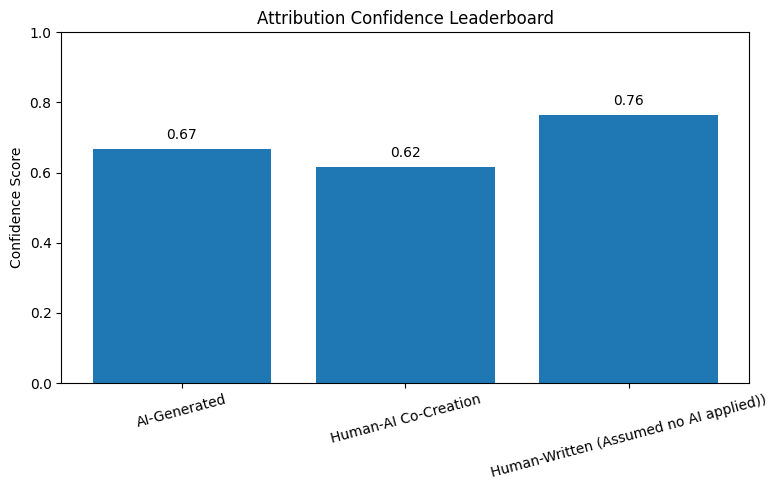

In [24]:
# 📊 Plot Confidence Score Graph
labels = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values)
plt.ylim(0, 1)
plt.ylabel('Confidence Score')
plt.title('Attribution Confidence Leaderboard')
plt.xticks(rotation=15)

# Annotate bars with score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ⚠️ **CAUTION: Heuristic-Based Attribution**

This method is **simple**, **transparent**, and useful for quick experimentation. However, it comes with notable limitations:

- ❌ **Not trained on labeled data** — relies on hand-crafted logic  
- 📏 **Lacks precision at scale** — not suitable for production environments  
- 🔄 **Easily fooled by paraphrasing or slight rewording**  
- 🧪 Performs best for **exploratory analysis**, **rapid prototyping**, or **educational demonstrations**

---

## ✅ **When It’s Useful**

- Teaching or learning the **basics of content attribution**  
- Rapidly exploring **style differences** between texts  
- Building a **lightweight prototype** before investing in more complex models  
- Supplementing model outputs with **rule-based insights**

---

## ✅ **Suggested Best Practices**

- Use as a **baseline** to compare with ML or zero-shot methods  
- Combine with **metadata** (e.g., time of writing, writing tools used) to improve accuracy  
- Apply in **controlled environments** where risk of misclassification is low  
- Always pair with **human judgment** in sensitive or impactful use cases
